# Assignment 2(due on 11/08)

## Student:姜天赐（12332290），Gtihub：Tcjiang2023
## 批改人：张鹏


## 得分：48/50

### 1 Significant earthquakes since 2150 B.C.

In [1]:
import numpy as np
import xarray as xr
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#1.1


Sig_Eqs = pd.read_csv('earthquakes-2023-11-04_01-46-34_+0800.tsv', sep='\t')
Sig_Eqs.tail()


,Search Parameters,Year,Mo,Dy,Hr,Country,Mag,Deaths
6394,NaN,2023.0,10.0,7.0,8.0,PAPUA NEW GUINEA,6.9,NaN
6395,NaN,2023.0,10.0,7.0,6.0,AFGHANISTAN,6.3,1480.0
6396,NaN,2023.0,10.0,8.0,20.0,JAPAN,4.9,NaN
6397,NaN,2023.0,10.0,11.0,0.0,AFGHANISTAN,6.3,3.0
6398,NaN,2023.0,10.0,15.0,3.0,AFGHANISTAN,6.3,4.0


In [3]:
# Death number in each country 
Death_num = Sig_Eqs.groupby('Country').sum().sort_values('Deaths', ascending=False)
print(Death_num['Deaths'].head(10))

Country
CHINA         2075045.0
TURKEY        1188881.0
IRAN          1011449.0
ITALY          498478.0
SYRIA          439224.0
HAITI          323478.0
AZERBAIJAN     317219.0
JAPAN          279085.0
ARMENIA        191890.0
PAKISTAN       145083.0
Name: Deaths, dtype: float64


<Axes: xlabel='Year'>

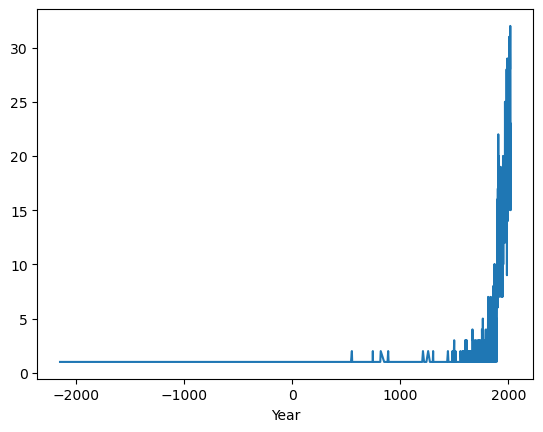

In [4]:
#1.2

Big_Eqs = Sig_Eqs.loc[Sig_Eqs['Mag'] > 6.0]

Big_Eqs.groupby('Year').describe()['Mag']['count'].plot()

In [5]:
#1.3

Sig_Eqs.fillna(-1, inplace = True)
Sig_Eqs

,Search Parameters,Year,Mo,Dy,Hr,Country,Mag,Deaths
0,[],-1.0,-1.0,-1.0,-1.0,-1,-1.0,-1.0
1,-1,-2150.0,-1.0,-1.0,-1.0,JORDAN,7.3,-1.0
2,-1,-2000.0,-1.0,-1.0,-1.0,SYRIA,-1.0,-1.0
3,-1,-2000.0,-1.0,-1.0,-1.0,TURKMENISTAN,7.1,1.0
4,-1,-1610.0,-1.0,-1.0,-1.0,GREECE,-1.0,-1.0
...,...,...,...,...,...,...,...,...
6394,-1,2023.0,10.0,7.0,8.0,PAPUA NEW GUINEA,6.9,-1.0
6395,-1,2023.0,10.0,7.0,6.0,AFGHANISTAN,6.3,1480.0
6396,-1,2023.0,10.0,8.0,20.0,JAPAN,4.9,-1.0
6397,-1,2023.0,10.0,11.0,0.0,AFGHANISTAN,6.3,3.0


In [6]:
Sig_Eqs_Count_byYear = Sig_Eqs.groupby('Country')['Year'].count().sort_values(ascending=False).to_frame().reset_index()
Sig_Eqs_Count_byYear = Sig_Eqs_Count_byYear.rename(columns={'Year':'Count'})
Sig_Eqs_Count_byYear

,Country,Count
0,CHINA,620
1,JAPAN,414
2,INDONESIA,411
3,IRAN,384
4,TURKEY,335
...,...,...
152,SUDAN,1
153,SRI LANKA,1
154,NORWAY,1
155,PALAU,1


In [7]:
Lar_eq = Sig_Eqs.groupby('Country')['Mag'].idxmax()
Lar_eq = Sig_Eqs.loc[Lar_eq][['Year','Mo','Dy','Country']]
Lar_eq

,Year,Mo,Dy,Country
6315,2021.0,10.0,12.0,-1
2727,1909.0,7.0,7.0,AFGHANISTAN
2395,1893.0,6.0,14.0,ALBANIA
4449,1980.0,10.0,10.0,ALGERIA
5010,1998.0,3.0,25.0,ANTARCTICA
...,...,...,...,...
2409,1894.0,4.0,29.0,VENEZUELA
3323,1935.0,11.0,1.0,VIETNAM
4864,1993.0,3.0,12.0,WALLIS AND FUTUNA (FRENCH TERRITORY)
4500,1982.0,12.0,13.0,YEMEN


In [8]:
eq_count_year = pd.merge(Sig_Eqs_Count_byYear, Lar_eq,on = ['Country'])
eq_count_year = eq_count_year.set_index('Country')            
eq_count_year

,Count,Year,Mo,Dy
Country,,,,
CHINA,620,1668.0,7.0,25.0
JAPAN,414,2011.0,3.0,11.0
INDONESIA,411,2004.0,12.0,26.0
IRAN,384,856.0,12.0,22.0
TURKEY,335,1939.0,12.0,26.0
...,...,...,...,...
SUDAN,1,1993.0,8.0,1.0
SRI LANKA,1,1882.0,1.0,-1.0
NORWAY,1,1819.0,8.0,31.0


In [9]:
def CountEq_LargestEq(Country):
    Country = Country.upper()
    count = eq_count_year.loc[Country]['Count']
    year = eq_count_year.loc[Country]['Year']
    month = eq_count_year.loc[Country]['Mo']
    day = eq_count_year.loc[Country]['Dy']
    print('The number of earthquake in ' + Country + ' is ' + str(int(count)) + ', the date of largest earthquake is ' + str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)))
    print('P.S. if there are \'-1\' in the date, it means the data has lost')

In [10]:
CountEq_LargestEq('SRI LANKA')

The number of earthquake in SRI LANKA is 1, the date of largest earthquake is 1882-1--1
P.S. if there are '-1' in the date, it means the data has lost


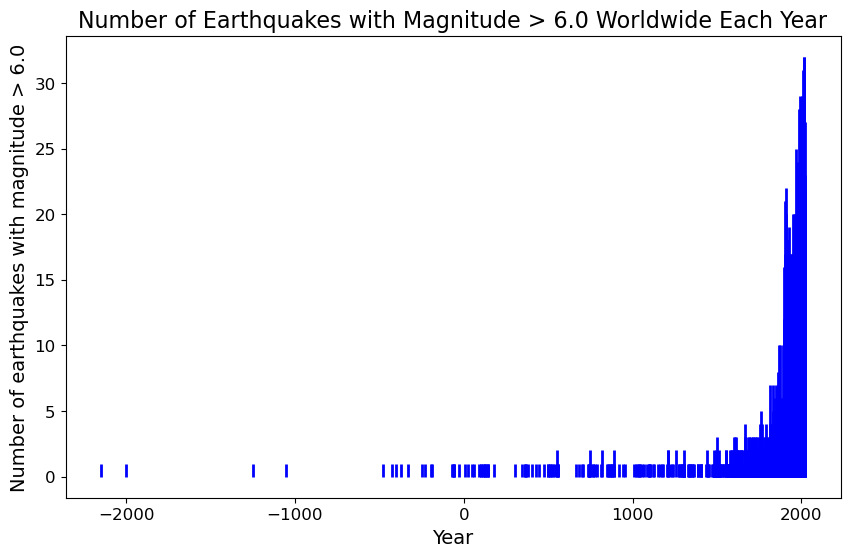

In [23]:
#1.2 助教添加
# 筛选出震级大于6.0的地震
large_quakes = Sig_Eqs[Sig_Eqs['Mag'] > 6.0]

# 按年份对数据进行分组，并得到每年的地震次数
quakes_by_year = large_quakes.groupby('Year')['Mag'].count()

plt.figure(figsize=(10, 6))
plt.vlines(quakes_by_year.index, ymin=0, ymax=quakes_by_year.values, color='blue', linewidth=2)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of earthquakes with magnitude > 6.0', fontsize=14)
plt.title('Number of Earthquakes with Magnitude > 6.0 Worldwide Each Year', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=12)

# Displaying the plot
plt.show()

### 第一题代码运行正常，可以输出正确结果，报告中也展示了输出内容，也针对问题给出文字分析 第二问绘图有一点点问题，建议绘制竖线图，见上面代码助教添加代码


### 得分：24/25
### --------------------------------------------------------------------------------------------

###  2. Wind speed in Shenzhen during the past 10 years

/tmp/ipykernel_411525/1900297180.py:1: DtypeWarning: Columns (4,8,9,12,15,21,22,24,26,31,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  wind_speed = pd.read_csv('2281305.csv')[['DATE','WND']]


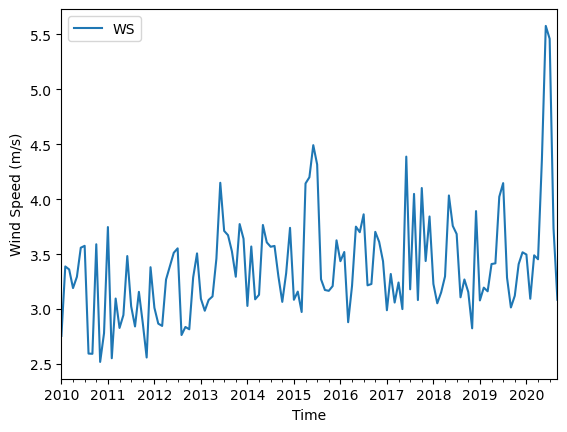

In [11]:

wind_speed = pd.read_csv('2281305.csv')[['DATE','WND']]


temp = wind_speed['WND'].str.split(',', expand = True)
wind_speed = pd.merge(wind_speed, temp, left_index = True, right_index = True)
wind_speed = wind_speed.rename(columns={0:'WD', 1:'WD_QC', 2:'OB', 3:'WS', 4:'WS_QC'})

# Calcul the true wind speed
wind_speed['WS'] = wind_speed['WS'].astype(int).div(10)

wind_speed['date'] = pd.to_datetime(wind_speed['DATE'])
wind_speed = wind_speed.drop(columns = ['DATE'])
wind_speed = wind_speed.set_index('date')

wind_speed_fil = wind_speed.loc[wind_speed['WS'] != 999.9]
wind_speed_fil

monthly_wind_speed = wind_speed_fil.resample('M')['WS'].mean()
monthly_wind_speed

monthly_wind_speed.plot()
plt.xlabel('Time')
plt.ylabel('Wind Speed (m/s)')
plt.legend()

### 第二题代码运行正常，可以输出正确结果。报告中展现了代码和结果，但没有对总体趋势 Is there a trend in monthly averaged wind speed within the past 10 years?的描述。

### 得分9/10
### ---------------------------------------------------------------------------------------------

###  3. Explore a data set

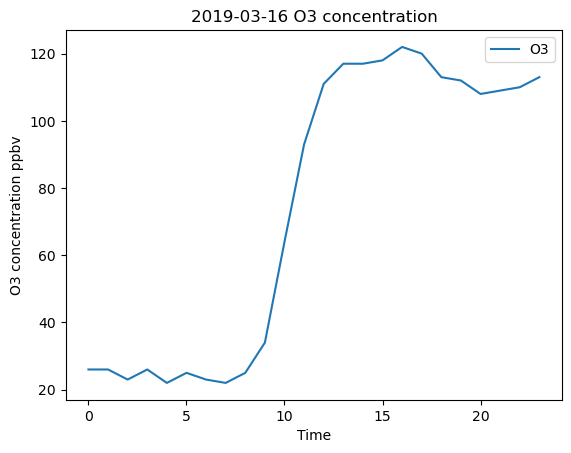

In [15]:
#3.1
poll_data = pd.read_csv('china_cities_20190316.csv')
poll_data
poll_data_cleaned = poll_data.dropna(axis = 1)
poll_data_cleaned
O3_conc = poll_data_cleaned.loc[(poll_data_cleaned['hour'] == 1) & (poll_data_cleaned['type'] == 'O3') ]
for i in range(1,24):
    temp = poll_data_cleaned.loc[(poll_data_cleaned['hour'] == i) & (poll_data_cleaned['type'] == 'O3') ]
    O3_conc = pd.concat([O3_conc, temp], ignore_index=True)
O3_conc['深圳'].plot()
plt.xlabel('Time')
plt.ylabel('O3 concentration ppbv')
plt.title('2019-03-16 O3 concentration')
plt.legend(labels = ['O3'])

In [16]:
O3_max = O3_conc.drop(['type', 'date', 'hour'], axis=1).max()
O3_max

北京         86.0
天津         91.0
石家庄       106.0
唐山         94.0
秦皇岛        95.0
          ...  
昌吉州        29.0
阿克苏地区     176.0
和田地区       80.0
伊犁哈萨克州    101.0
五家渠        26.0
Length: 305, dtype: float64

In [18]:
O3_min = O3_conc.drop(['type', 'date', 'hour'], axis=1).min()
O3_min.sort_values().head(10)

五家渠    2.0
金华     2.0
巴中     2.0
中山     2.0
眉山     3.0
吕梁     3.0
邢台     3.0
长沙     3.0
佛山     3.0
咸阳     3.0
dtype: float64

In [19]:
O3_mean = O3_conc.drop(['type', 'date', 'hour'], axis=1).mean()
O3_mean.sort_values(ascending=False).head(10)

莆田      109.416667
大理州     104.500000
阿拉善盟    104.458333
厦门      102.791667
湛江      101.083333
迪庆州      99.833333
茂名       99.500000
泉州       99.208333
保山       98.500000
汕头       97.583333
dtype: float64

In [20]:
O3_var = O3_conc.drop(['type', 'date', 'hour'], axis=1).var()
O3_var.sort_values(ascending=False).head(10)

江门    4552.737319
广州    4380.688406
台州    3845.673913
义乌    3421.606884
金华    3399.326087
东莞    3385.201087
句容    3267.070652
徐州    3065.809783
随州    2958.253623
佛山    2827.391304
dtype: float64

Text(0, 0.5, 'O3 var')

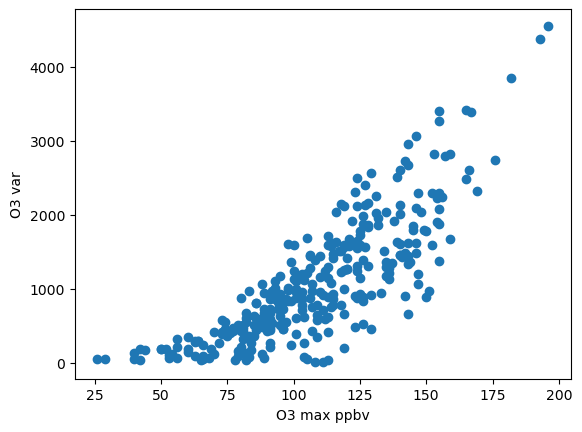

In [21]:
plt.scatter(O3_max, O3_var)
plt.xlabel('O3 max ppbv')
plt.ylabel('O3 var')

In [22]:
corr = np.corrcoef(O3_max, O3_var)[0,1]
print(corr)

0.8150119959666451


### 第三题代码输出结果正确，也在报告中展现了输出结果和相应的分析
### 得分15/15
